# Lecture 1: Introduction to Monte Carlo algorithms
## Estimating $\pi$ via direct sampling

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
%config InlineBackend.figure_format='retina'

In [2]:
def genPlot(xs, ys, hits):
    plt.figure(figsize=(5,5))
    hits = hits == 1.0
    nohits = hits == 0.0
    plt.scatter(xs[nohits], ys[nohits], alpha=0.5)
    plt.scatter(xs[hits], ys[hits], alpha=0.5)

In [3]:
def directPi(N=1000, plot=False):
    xs = np.random.uniform(-1.0, +1.0, size=N)
    ys = np.random.uniform(-1.0, +1.0, size=N)
    hits = xs**2 + ys**2 < 1.0
    if plot: genPlot(xs, ys, hits)
    return 4*sum(hits)/N

3.172

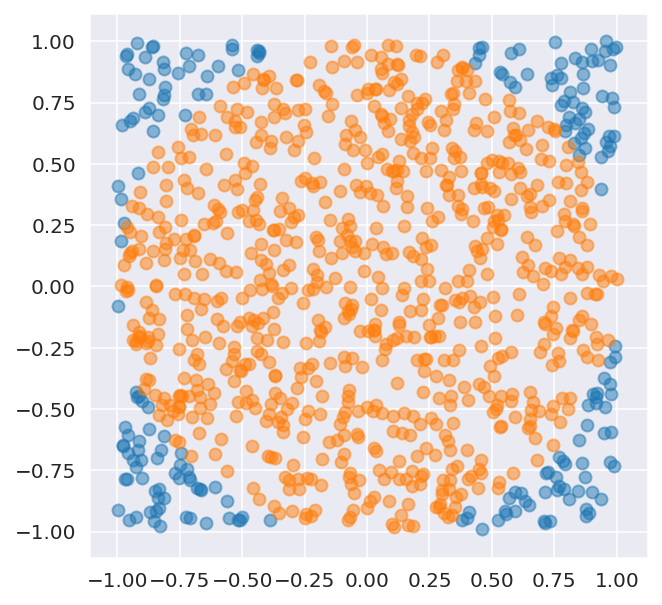

In [4]:
directPi(plot=True)

In [5]:
trials1 = [directPi() for i in range(10)]

In [6]:
trials1

[3.188, 3.216, 3.216, 3.228, 3.144, 3.128, 3.252, 3.188, 3.252, 3.204]

## Estimating $\pi$ via a Markov sampling

In [7]:
def markovPi(N=1000, delta=0.1, plot=False):
    x, y = 1.0, 1.0
    n_hits = 0
    xs, ys, hits = np.zeros(N), np.zeros(N), np.zeros(N)
    for i in range(N):
        dx = np.random.uniform(-delta, delta)
        dy = np.random.uniform(-delta, delta)
        if abs(x+dx)<1 and abs(y+dy)<1:
            x, y = x+dx, y+dy
        xs[i] = x
        ys[i] = y
        hits[i] = (x**2 + y**2 < 1.0)
    if plot: genPlot(xs, ys, hits)
    return 4*sum(hits)/N

2.936

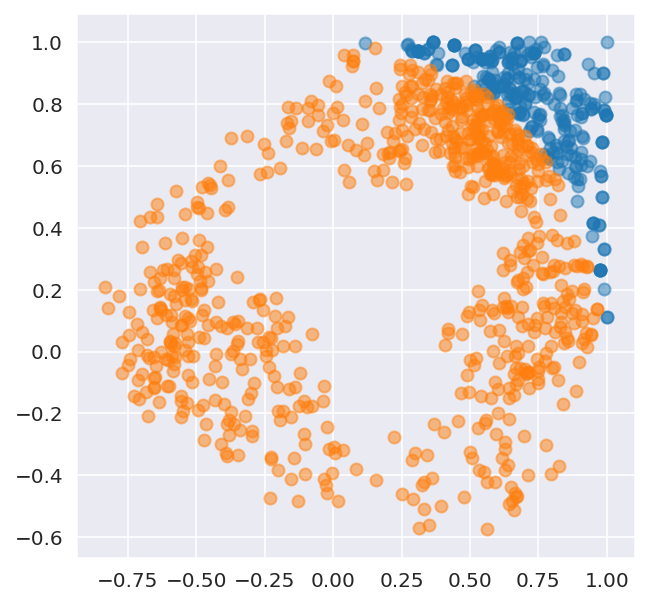

In [8]:
markovPi(plot=True)

In [9]:
trials2 = [markovPi() for i in range(10)]

In [10]:
trials2

[3.148, 2.284, 3.608, 2.08, 2.628, 3.028, 2.556, 3.356, 2.984, 2.248]